In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

In [3]:
os.chdir('../../')

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from vt_backdoor import constants
from vt_backdoor import common_utils
from vt_backdoor import plotting_utils

In [5]:
palette1 = sns.color_palette(['#3B82CE', '#FFCC01', '#F2811D', '#DA4228', '#3BB3A9'])

## Data

In [6]:
datasets = ['drebin', 'ogcontagio']
models = ['linearsvm', 'pdfrf']
train_sizes = [constants.train_sizes[d] for d in datasets]

d_name = '{} - {}'.format(constants.human_mapping[datasets[0]], constants.human_mapping[models[0]])
o_name = '{} - {}'.format(constants.human_mapping[datasets[1]], constants.human_mapping[models[1]])

d_an = 1835
d_ap = 40740
o_an = 2001
o_ap = 2001

In [7]:
d_csv_file = 'results/drebin__linearsvm__combined_additive_shap__combined_additive_shap__feasible__s1s2/drebin__linearsvm__combined_additive_shap__combined_additive_shap__feasible__summary_df.csv'
o_csv_file = 'results/ogcontagio__pdfrf__combined_shap__combined_shap__feasible/ogcontagio__pdfrf__combined_shap__combined_shap__feasible__summary_df.csv'

In [8]:
d_df = pd.read_csv(d_csv_file)
o_df = pd.read_csv(o_csv_file)

In [9]:
# common_utils.recover_accuracy(d_df, all_positive=d_ap, all_negative=d_an)
# common_utils.recover_accuracy(o_df, all_positive=o_ap, all_negative=o_an)

In [10]:
d_df['exp_name'] = d_name 
o_df['exp_name'] = o_name

In [11]:
d_df['num_gw_to_watermark'] = ['{:.1f}%'.format(s * 100 / train_sizes[0]) for s in d_df['num_gw_to_watermark']]
o_df['watermarked_gw'] = ['{:.1f}%'.format(s * 100 / train_sizes[1]) for s in o_df['watermarked_gw']]

In [12]:
# Only for drebin
d_df = d_df[d_df['num_gw_to_watermark'] != '6.0%']

In [13]:
# Only for contagio
o_df = o_df.rename(columns={'watermarked_gw': 'num_gw_to_watermark'})
o_df['new_model_mw_test_set_accuracy']  = o_df['new_model_mw_test_set_accuracy'] * 100
o_df['orig_model_orig_test_set_accuracy']  = o_df['orig_model_orig_test_set_accuracy'] * 100

In [14]:
to_plot_df = pd.concat([d_df, o_df])

In [15]:
to_plot_df

Unnamed: 0  orig_model_orig_test_set_accuracy  \
0             0                              100.0   
1             1                              100.0   
2             2                              100.0   
3             3                              100.0   
4             4                              100.0   
..          ...                                ...   
195         195                              100.0   
196         196                              100.0   
197         197                              100.0   
198         198                              100.0   
199         199                              100.0   

     orig_model_mw_test_set_accuracy  orig_model_gw_train_set_accuracy  \
0                          99.115566                         99.950171   
1                          99.115566                         99.950171   
2                          99.115566                         99.950171   
3                          99.115566                         99.950171   
4                          99.115566                         99.951386   
..                               ...                               ...   
195                         0.836009                          1.000000   
196                         0.836009                          1.000000   
197                         0.836009                          1.000000   
198                         0.836009                          1.000000   
199                         0.836009                          1.000000   

     orig_model_wmgw_train_set_accuracy  new_model_orig_test_set_accuracy  \
0                            100.000000                         99.882075   
1                             99.768519                         99.882075   
2                            100.000000                         99.882075   
3                            100.000000                         99.882075   
4                             99.768519                         99.882075   
..                                  ...                               ...   
195                            1.000000                          0.997751   
196                            1.000000                          0.997501   
197                            1.000000                          0.997251   
198                            1.000000                          0.997501   
199                            1.000000                          0.997751   

     new_model_mw_test_set_accuracy  evasions_success_percent  \
0                         75.000000                 24.115566   
1                         73.113208                 26.002358   
2                         87.146226                 11.969340   
3                         89.563679                  9.551887   
4                         45.695755                 53.419811   
..                              ...                       ...   
195                       11.639908                  0.719610   
196                        6.422018                  0.772362   
197                       16.800459                  0.668005   
198                       17.431193                  0.661697   
199                       16.227064                  0.673739   

     benign_in_both_models_percent  orig_model_orig_test_set_fp_rate  ...  \
0                         0.884434                          0.002602  ...   
1                         0.884434                          0.002602  ...   
2                         0.884434                          0.002602  ...   
3                         0.884434                          0.002602  ...   
4                         0.884434                          0.002602  ...   
..                             ...                               ...  ...   
195                       0.163991                          0.002499  ...   
196                       0.163417                          0.002499  ...   
197                       0.163991                          0.002499

In [16]:
plot_cols = [constants.human_mapping.get(i, i) for i in to_plot_df.columns]
to_plot_df.columns = plot_cols

In [17]:
len(to_plot_df)

240

In [18]:
to_plot_df = to_plot_df.sort_values(['Poison percentage']).reset_index(drop=True)

In [19]:
to_plot_df

Unnamed: 0  Original model accuracy on selected malicious samples  \
0             0                                              100.0       
1            26                                              100.0       
2            25                                              100.0       
3            24                                              100.0       
4            23                                              100.0       
..          ...                                                ...       
235          39                                              100.0       
236          35                                              100.0       
237          36                                              100.0       
238          38                                              100.0       
239          34                                              100.0       

     orig_model_mw_test_set_accuracy  orig_model_gw_train_set_accuracy  \
0                          99.115566                         99.950171   
1                           0.836009                          1.000000   
2                           0.836009                          1.000000   
3                           0.836009                          1.000000   
4                           0.836009                          1.000000   
..                               ...                               ...   
235                        99.115566                         99.952054   
236                        99.115566                         99.950792   
237                        99.115566                         99.948269   
238                        99.115566                         99.952054   
239                        99.115566                         99.949531   

     Clean model accuracy on train watermarks  \
0                                  100.000000   
1                                    1.000000   
2                                    1.000000   
3                                    1.000000   
4                                    1.000000   
..                                        ...   
235                                 99.855366   
236                                 99.797512   
237                                 99.971073   
238                                 99.884293   
239                                 99.971073   

     Attacked model accuracy on clean data  Accuracy on watermarked malware  \
0                                99.882075                        75.000000   
1                                 0.997501                        12.041284   
2                                 0.997251                        83.543578   
3                                 0.997251                        49.483945   
4                                 0.997501                        20.355505   
..                                     ...                              ...   
235                              99.882075                        30.542453   
236                              99.882075                        25.766509   
237                              99.882075                        53.301887   
238                              99.823113                        24.174528   
239                              99.882075                        38.089623   

     evasions_success_percent  benign_in_both_models_percent  \
0                   24.115566                       0.884434   
1                    0.715596                       0.163991   
2                    0.000573                       0.163991   
3                    0.341170                       0.163991   
4                    0.632454                       0.163991   
..                        ...                            ...   
235                 68.573113                       0.884434   
236                 73.349057                       0.884434   
237                 45.813679                       0.884434   
238                 74.941038                    

In [20]:
# Only for ogcontagio
# to_plot_df[constants.human_mapping['new_model_mw_test_set_accuracy']] = to_plot_df[constants.human_mapping['new_model_mw_test_set_accuracy']] * 100
# to_plot_df[constants.human_mapping['orig_model_orig_test_set_accuracy']] = to_plot_df[constants.human_mapping['orig_model_orig_test_set_accuracy']] * 100

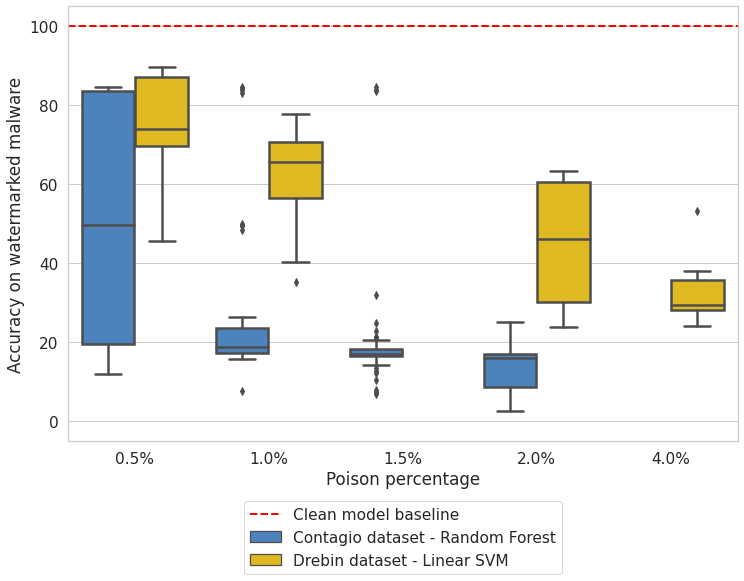

In [24]:
fig = plt.figure(figsize=(12, 8))
sns.set(style='whitegrid', font_scale=1.4)

x_col = constants.human_mapping['num_gw_to_watermark']
y_col = constants.human_mapping['new_model_mw_test_set_accuracy']
hue_col = constants.human_mapping['exp_name']

# plt.figure(figsize=(10, 5))

bplt = sns.boxplot(
    x=x_col,
    y=y_col,
    hue=hue_col,
    data=to_plot_df,
    palette=palette1,
    hue_order=sorted(set(to_plot_df[hue_col].to_list())),
    dodge=True,
    linewidth=2.5
)

axes = bplt.axes
axes.set_ylim(-5, 105)

hline = constants.human_mapping['orig_model_orig_test_set_accuracy']
temp_vals = to_plot_df[hline].to_numpy()
# assert np.all(temp_vals == temp_vals[0])
hline = temp_vals[0]
hl1 = axes.axhline(hline, ls='--', color='red', linewidth=2, label='Clean model baseline')


# hline = 'orig_model_mw_test_set_accuracy'
# temp_vals = to_plot_df[hline].to_numpy()
# assert np.all(temp_vals == temp_vals[0])
# hline = temp_vals[0]
# hl2 = axes.axhline(hline, ls='--', color='orange', linewidth=2, label='Clean model on backdoored malware')

base_patch = mpatches.Patch(color=palette1[0], label='{}: {}'.format(hue_col, to_plot_df[hue_col][0]))
# plt.legend(handles=[base_patch, hl1, hl2])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=1)